In [ ]:
import pandas as pd
import numpy as np
import sklearn
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime
from mpl_toolkits.basemap import Basemap
sns.set_style('darkgrid')

In [ ]:
pd.set_option('max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth',1000)

In [ ]:
df = pd.read_csv('train_merged.csv')
#filtering down to Rate codes 1, 2 and 3 - NYC and its surrounding airports.
taxidf = df.copy()
taxidf = taxidf[taxidf.rate_code < 4]
taxidf.tail()

medallion                      hack_license vendor_id  rate_code      pickup_datetime     dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude payment_type  fare_amount  surcharge  mta_tax  tip_amount  tolls_amount  total_amount
14064063  D10870DF96A6A201337FF2EF5B3D893D  287F30AEA8CF3242D100EC3CFF5BE2DA       CMT          1  2013-04-30 23:59:57  2013-05-01 00:03:37                1                219            1.0        -73.981850        40.783993         -73.991020         40.770947          CSH          5.5        0.5      0.5        0.00           0.0          6.50
14064064  CB0CF7051AAD729BD1F030EC42E3AAFB  69D7B9A38A419958A40EC9F299642F17       CMT          1  2013-04-30 23:59:58  2013-05-01 00:16:44                1               1006            4.2        -73.976997        40.761559         -74.003853         40.742271          CRD         14.5        0.5      0.5        2.00           0.0         17.50
14064065  1948C5FBB3E9E807D27074F528465F90  00C2CDB494E2163E6B83204FE5AAE516       CMT          1  2013-04-30 23:59:58  2013-05-01 00:02:52                2                173            0.6        -73.979881        40.776081         -73.982071         40.768272          CRD          4.0        0.5      0.5        1.00           0.0          6.00
14064066  A8262FA0AFCB6C7229F6888EAFBDE076  5F9351CC273E38A49A6CD691FFF5B980       CMT          1  2013-04-30 23:59:58  2013-05-01 00:06:38                1                399            1.7        -73.942482        40.779572         -73.942482         40.779572          CRD          7.5        0.5      0.5        1.11           0.0          9.61
14064067  CC75E7B29C4D32F9A45F6582F448C789  1BC47AA485CD2C61E65A2CA57C690918       CMT          1  2013-04-30 23:59:58  2013-05-01 00:07:16                1                438            1.7        -73.998215        40.729637         -73.992798         40.748791          CSH          7.5        0.5      0.5        0.00           0.0          8.50

In [ ]:
taxidf['pickup_datetime'] = pd.to_datetime(taxidf['pickup_datetime'])
taxidf['dropoff_datetime'] = pd.to_datetime(taxidf['dropoff_datetime'])
taxidf['date'] = taxidf.pickup_datetime.dt.date
taxidf.tail()

medallion                      hack_license vendor_id  rate_code     pickup_datetime    dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude payment_type  fare_amount  surcharge  mta_tax  tip_amount  tolls_amount  total_amount        date
14064063  D10870DF96A6A201337FF2EF5B3D893D  287F30AEA8CF3242D100EC3CFF5BE2DA       CMT          1 2013-04-30 23:59:57 2013-05-01 00:03:37                1                219            1.0        -73.981850        40.783993         -73.991020         40.770947          CSH          5.5        0.5      0.5        0.00           0.0          6.50  2013-04-30
14064064  CB0CF7051AAD729BD1F030EC42E3AAFB  69D7B9A38A419958A40EC9F299642F17       CMT          1 2013-04-30 23:59:58 2013-05-01 00:16:44                1               1006            4.2        -73.976997        40.761559         -74.003853         40.742271          CRD         14.5        0.5      0.5        2.00           0.0         17.50  2013-04-30
14064065  1948C5FBB3E9E807D27074F528465F90  00C2CDB494E2163E6B83204FE5AAE516       CMT          1 2013-04-30 23:59:58 2013-05-01 00:02:52                2                173            0.6        -73.979881        40.776081         -73.982071         40.768272          CRD          4.0        0.5      0.5        1.00           0.0          6.00  2013-04-30
14064066  A8262FA0AFCB6C7229F6888EAFBDE076  5F9351CC273E38A49A6CD691FFF5B980       CMT          1 2013-04-30 23:59:58 2013-05-01 00:06:38                1                399            1.7        -73.942482        40.779572         -73.942482         40.779572          CRD          7.5        0.5      0.5        1.11           0.0          9.61  2013-04-30
14064067  CC75E7B29C4D32F9A45F6582F448C789  1BC47AA485CD2C61E65A2CA57C690918       CMT          1 2013-04-30 23:59:58 2013-05-01 00:07:16                1                438            1.7        -73.998215        40.729637         -73.992798         40.748791          CSH          7.5        0.5      0.5        0.00           0.0          8.50  2013-04-30

In [ ]:
# average daily earnings of a taxi
taxidf.groupby(['medallion', 'date'])['total_amount'].sum().mean()

479.87261688433625

In [ ]:
#average daily earnings of a taxi driver
taxidf.groupby(['hack_license', 'date'])['total_amount'].sum().mean()

258.90833059665266

In [ ]:
# max daily earnings of a taxi driver
taxidf.groupby(['medallion', 'date'])['total_amount'].sum().sort_values(ascending=False)

medallion                         date      
C767E6FAAE6A65D77701979221AE61CF  2013-04-17    5093.96
80D52C5885ECE494DE95F9B2E69DA7EF  2013-04-12    1288.53
8DEB70907D00AA1D7FF5E2683240549B  2013-04-19    1061.25
45886CDFD76DF25E0ACA5E3ED611C68E  2013-04-14    1056.87
C78F6ED99E72F27BD00EDDD768F9B61B  2013-04-20    1035.81
80D52C5885ECE494DE95F9B2E69DA7EF  2013-04-11    1020.85
5F2EFC03B544635C9B0E7A4AA4FF9AC3  2013-04-28    1020.23
75EE5A7E8B24FD2B2FB715955834C524  2013-04-06    1015.18
6C2FA93D2F3E5580B617EDEBFF33AD5A  2013-04-12    1011.39
FF40FB8123940D9F96D33EDA1D92A83C  2013-04-13    1004.83
C70EECB031BB649F5FB1AB95F00AC53A  2013-04-12    1004.24
19E063791B0DF5A558B8488180DDAB67  2013-04-14     998.97
986B763D0A245A998B865F6AC1A055CA  2013-04-20     997.91
44A8553C60763B082E348394F2E32464  2013-04-12     996.65
0C9C589C0AD57ECCB633CB90A33DC37A  2013-04-06     992.72
75EE5A7E8B24FD2B2FB715955834C524  2013-04-11     992.08
5F9C08A05F6449EE31F056AEB85855BB  2013-04-12     990.83
19E

In [ ]:
# min daily earnings of a taxi driver
taxidf.groupby(['medallion', 'date'])['total_amount'].sum().min()

3.0

In [ ]:
taxidf2 = taxidf.copy()
taxidf2['pickup_latitude'] = taxidf2.pickup_latitude.round(2)
taxidf2['pickup_longitude'] = taxidf2.pickup_longitude.round(2)
taxidf2['dropoff_latitude'] = taxidf2.dropoff_latitude.round(2)
taxidf2['dropoff_longitude'] = taxidf2.dropoff_longitude.round(2)
taxidf2.tail()

medallion                      hack_license vendor_id  rate_code     pickup_datetime    dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude payment_type  fare_amount  surcharge  mta_tax  tip_amount  tolls_amount  total_amount        date
14064063  D10870DF96A6A201337FF2EF5B3D893D  287F30AEA8CF3242D100EC3CFF5BE2DA       CMT          1 2013-04-30 23:59:57 2013-05-01 00:03:37                1                219            1.0            -73.98            40.78             -73.99             40.77          CSH          5.5        0.5      0.5        0.00           0.0          6.50  2013-04-30
14064064  CB0CF7051AAD729BD1F030EC42E3AAFB  69D7B9A38A419958A40EC9F299642F17       CMT          1 2013-04-30 23:59:58 2013-05-01 00:16:44                1               1006            4.2            -73.98            40.76             -74.00             40.74          CRD         14.5        0.5      0.5        2.00           0.0         17.50  2013-04-30
14064065  1948C5FBB3E9E807D27074F528465F90  00C2CDB494E2163E6B83204FE5AAE516       CMT          1 2013-04-30 23:59:58 2013-05-01 00:02:52                2                173            0.6            -73.98            40.78             -73.98             40.77          CRD          4.0        0.5      0.5        1.00           0.0          6.00  2013-04-30
14064066  A8262FA0AFCB6C7229F6888EAFBDE076  5F9351CC273E38A49A6CD691FFF5B980       CMT          1 2013-04-30 23:59:58 2013-05-01 00:06:38                1                399            1.7            -73.94            40.78             -73.94             40.78          CRD          7.5        0.5      0.5        1.11           0.0          9.61  2013-04-30
14064067  CC75E7B29C4D32F9A45F6582F448C789  1BC47AA485CD2C61E65A2CA57C690918       CMT          1 2013-04-30 23:59:58 2013-05-01 00:07:16                1                438            1.7            -74.00            40.73             -73.99             40.75          CSH          7.5        0.5      0.5        0.00           0.0          8.50  2013-04-30

In [ ]:
taxidf2['pickup_geocode'] = taxidf2.pickup_latitude.astype(str) + ', ' + taxidf2.pickup_longitude.astype(str)
taxidf2['dropoff_geocode'] = taxidf2.dropoff_latitude.astype(str) + ', ' + taxidf2.dropoff_longitude.astype(str)
taxidf2.tail()

medallion                      hack_license vendor_id  rate_code     pickup_datetime    dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude payment_type  fare_amount  surcharge  mta_tax  tip_amount  tolls_amount  total_amount        date pickup_geocode dropoff_geocode
14064063  D10870DF96A6A201337FF2EF5B3D893D  287F30AEA8CF3242D100EC3CFF5BE2DA       CMT          1 2013-04-30 23:59:57 2013-05-01 00:03:37                1                219            1.0            -73.98            40.78             -73.99             40.77          CSH          5.5        0.5      0.5        0.00           0.0          6.50  2013-04-30  40.78, -73.98   40.77, -73.99
14064064  CB0CF7051AAD729BD1F030EC42E3AAFB  69D7B9A38A419958A40EC9F299642F17       CMT          1 2013-04-30 23:59:58 2013-05-01 00:16:44                1               1006            4.2            -73.98            40.76             -74.00             40.74          CRD         14.5        0.5      0.5        2.00           0.0         17.50  2013-04-30  40.76, -73.98    40.74, -74.0
14064065  1948C5FBB3E9E807D27074F528465F90  00C2CDB494E2163E6B83204FE5AAE516       CMT          1 2013-04-30 23:59:58 2013-05-01 00:02:52                2                173            0.6            -73.98            40.78             -73.98             40.77          CRD          4.0        0.5      0.5        1.00           0.0          6.00  2013-04-30  40.78, -73.98   40.77, -73.98
14064066  A8262FA0AFCB6C7229F6888EAFBDE076  5F9351CC273E38A49A6CD691FFF5B980       CMT          1 2013-04-30 23:59:58 2013-05-01 00:06:38                1                399            1.7            -73.94            40.78             -73.94             40.78          CRD          7.5        0.5      0.5        1.11           0.0          9.61  2013-04-30  40.78, -73.94   40.78, -73.94
14064067  CC75E7B29C4D32F9A45F6582F448C789  1BC47AA485CD2C61E65A2CA57C690918       CMT          1 2013-04-30 23:59:58 2013-05-01 00:07:16                1                438            1.7            -74.00            40.73             -73.99             40.75          CSH          7.5        0.5      0.5        0.00           0.0          8.50  2013-04-30   40.73, -74.0   40.75, -73.99

In [ ]:
# Creating trips with a combination of pickup and dropoff codes
taxidf3 = taxidf2.copy()
taxidf3['route'] = taxidf3.pickup_geocode + ' : ' + taxidf3.dropoff_geocode
taxidf3.tail()

medallion                      hack_license vendor_id  rate_code     pickup_datetime    dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude payment_type  fare_amount  surcharge  mta_tax  tip_amount  tolls_amount  total_amount        date pickup_geocode dropoff_geocode                          route
14064063  D10870DF96A6A201337FF2EF5B3D893D  287F30AEA8CF3242D100EC3CFF5BE2DA       CMT          1 2013-04-30 23:59:57 2013-05-01 00:03:37                1                219            1.0            -73.98            40.78             -73.99             40.77          CSH          5.5        0.5      0.5        0.00           0.0          6.50  2013-04-30  40.78, -73.98   40.77, -73.99  40.78, -73.98 : 40.77, -73.99
14064064  CB0CF7051AAD729BD1F030EC42E3AAFB  69D7B9A38A419958A40EC9F299642F17       CMT          1 2013-04-30 23:59:58 2013-05-01 00:16:44                1               1006            4.2            -73.98            40.76             -74.00             40.74          CRD         14.5        0.5      0.5        2.00           0.0         17.50  2013-04-30  40.76, -73.98    40.74, -74.0   40.76, -73.98 : 40.74, -74.0
14064065  1948C5FBB3E9E807D27074F528465F90  00C2CDB494E2163E6B83204FE5AAE516       CMT          1 2013-04-30 23:59:58 2013-05-01 00:02:52                2                173            0.6            -73.98            40.78             -73.98             40.77          CRD          4.0        0.5      0.5        1.00           0.0          6.00  2013-04-30  40.78, -73.98   40.77, -73.98  40.78, -73.98 : 40.77, -73.98
14064066  A8262FA0AFCB6C7229F6888EAFBDE076  5F9351CC273E38A49A6CD691FFF5B980       CMT          1 2013-04-30 23:59:58 2013-05-01 00:06:38                1                399            1.7            -73.94            40.78             -73.94             40.78          CRD          7.5        0.5      0.5        1.11           0.0          9.61  2013-04-30  40.78, -73.94   40.78, -73.94  40.78, -73.94 : 40.78, -73.94
14064067  CC75E7B29C4D32F9A45F6582F448C789  1BC47AA485CD2C61E65A2CA57C690918       CMT          1 2013-04-30 23:59:58 2013-05-01 00:07:16                1                438            1.7            -74.00            40.73             -73.99             40.75          CSH          7.5        0.5      0.5        0.00           0.0          8.50  2013-04-30   40.73, -74.0   40.75, -73.99   40.73, -74.0 : 40.75, -73.99

In [ ]:
# Filtering down to routes with 385+ trips (sample size from MOE,CI, and z-value)
taxidf4 = taxidf3.groupby('route').filter(lambda x: len(x) >= 385)
taxidf4.tail()

medallion                      hack_license vendor_id  rate_code     pickup_datetime    dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude payment_type  fare_amount  surcharge  mta_tax  tip_amount  tolls_amount  total_amount        date pickup_geocode dropoff_geocode                          route
14064062  663B7A92F7677B4807449344FDD373ED  025C5D47809A6A21CF8B28FA760443E1       CMT          1 2013-04-30 23:59:57 2013-05-01 00:07:11                2                434            2.2            -73.98            40.77             -73.95             40.78          CSH          9.0        0.5      0.5         0.0           0.0          10.0  2013-04-30  40.77, -73.98   40.78, -73.95  40.77, -73.98 : 40.78, -73.95
14064063  D10870DF96A6A201337FF2EF5B3D893D  287F30AEA8CF3242D100EC3CFF5BE2DA       CMT          1 2013-04-30 23:59:57 2013-05-01 00:03:37                1                219            1.0            -73.98            40.78             -73.99             40.77          CSH          5.5        0.5      0.5         0.0           0.0           6.5  2013-04-30  40.78, -73.98   40.77, -73.99  40.78, -73.98 : 40.77, -73.99
14064064  CB0CF7051AAD729BD1F030EC42E3AAFB  69D7B9A38A419958A40EC9F299642F17       CMT          1 2013-04-30 23:59:58 2013-05-01 00:16:44                1               1006            4.2            -73.98            40.76             -74.00             40.74          CRD         14.5        0.5      0.5         2.0           0.0          17.5  2013-04-30  40.76, -73.98    40.74, -74.0   40.76, -73.98 : 40.74, -74.0
14064065  1948C5FBB3E9E807D27074F528465F90  00C2CDB494E2163E6B83204FE5AAE516       CMT          1 2013-04-30 23:59:58 2013-05-01 00:02:52                2                173            0.6            -73.98            40.78             -73.98             40.77          CRD          4.0        0.5      0.5         1.0           0.0           6.0  2013-04-30  40.78, -73.98   40.77, -73.98  40.78, -73.98 : 40.77, -73.98
14064067  CC75E7B29C4D32F9A45F6582F448C789  1BC47AA485CD2C61E65A2CA57C690918       CMT          1 2013-04-30 23:59:58 2013-05-01 00:07:16                1                438            1.7            -74.00            40.73             -73.99             40.75          CSH          7.5        0.5      0.5         0.0           0.0           8.5  2013-04-30   40.73, -74.0   40.75, -73.99   40.73, -74.0 : 40.75, -73.99

In [ ]:
# The routes generate the highest revenue
ordered = taxidf4.groupby(['route', 'date'])['total_amount'].agg({sum, len}).reset_index()
ordered.sort_values(['sum', 'len'], ascending=[False, False]).head(20)

route        date       sum     len
43082  40.75, -73.99 : 40.76, -73.98  2013-04-25  31601.93  2982.0
61558  40.77, -73.87 : 40.76, -73.98  2013-04-22  30975.73   713.0
61561  40.77, -73.87 : 40.76, -73.98  2013-04-25  30282.95   696.0
43060  40.75, -73.99 : 40.76, -73.98  2013-04-03  30169.26  3197.0
61551  40.77, -73.87 : 40.76, -73.98  2013-04-15  29878.51   664.0
43081  40.75, -73.99 : 40.76, -73.98  2013-04-24  29122.84  2975.0
61545  40.77, -73.87 : 40.76, -73.98  2013-04-09  28977.08   663.0
43080  40.75, -73.99 : 40.76, -73.98  2013-04-23  28908.36  3031.0
43069  40.75, -73.99 : 40.76, -73.98  2013-04-12  28859.43  3076.0
43061  40.75, -73.99 : 40.76, -73.98  2013-04-04  28673.53  2994.0
61547  40.77, -73.87 : 40.76, -73.98  2013-04-11  28504.63   670.0
43073  40.75, -73.99 : 40.76, -73.98  2013-04-16  28480.65  2912.0
61559  40.77, -73.87 : 40.76, -73.98  2013-04-23  28423.70   644.0
43066  40.75, -73.99 : 40.76, -73.98  2013-04-09  28210.34  3082.0
43074  40.75, -73.99 : 40.76, -73.98  2013-04-17  27973.65  2911.0
61565  40.77, -73.87 : 40.76, -73.98  2013-04-29  27883.51   633.0
43059  40.75, -73.99 : 40.76, -73.98  2013-04-02  27800.52  3124.0
43086  40.75, -73.99 : 40.76, -73.98  2013-04-29  27703.29  2936.0
43079  40.75, -73.99 : 40.76, -73.98  2013-04-22  27598.28  3003.0
43067  40.75, -73.99 : 40.76, -73.98  2013-04-10  27447.62  2953.0

In [ ]:
# list of the routes that generate the highest revenue along with the number of trips per route in whole dataset (i.e, April 2013)
ordered2 = taxidf4.groupby(['route'])['total_amount'].agg({sum, len}).reset_index()
ordered2.sort_values(['sum', 'len'], ascending=[False, False]).head(10)

route        sum      len
1436  40.75, -73.99 : 40.76, -73.98  722612.28  78839.0
2052  40.77, -73.87 : 40.76, -73.98  668457.45  15424.0
1685  40.76, -73.97 : 40.75, -73.99  590744.80  50610.0
1774  40.76, -73.98 : 40.75, -73.99  587081.65  65963.0
2189  40.77, -73.96 : 40.76, -73.97  558885.32  66224.0
1684  40.76, -73.97 : 40.75, -73.98  545272.15  64337.0
1435  40.75, -73.99 : 40.76, -73.97  525268.60  44467.0
1426  40.75, -73.99 : 40.75, -73.98  522044.20  61683.0
1345  40.75, -73.98 : 40.76, -73.97  521643.72  62088.0
1704  40.76, -73.97 : 40.77, -73.96  518156.80  67073.0

In [ ]:
# routes that generates the highest revenue per hour
taxidf5 = taxidf4.copy()
taxidf5['trip_time_in_hours'] = 1.0*taxidf5['trip_time_in_secs']/3600
taxidf5['earnings_per_hour'] = 1.0*taxidf5['total_amount']/taxidf5['trip_time_in_hours']
taxidf5.tail()

medallion                      hack_license vendor_id  rate_code     pickup_datetime    dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude payment_type  fare_amount  surcharge  mta_tax  tip_amount  tolls_amount  total_amount        date pickup_geocode dropoff_geocode                          route  trip_time_in_hours  earnings_per_hour
14064062  663B7A92F7677B4807449344FDD373ED  025C5D47809A6A21CF8B28FA760443E1       CMT          1 2013-04-30 23:59:57 2013-05-01 00:07:11                2                434            2.2            -73.98            40.77             -73.95             40.78          CSH          9.0        0.5      0.5         0.0           0.0          10.0  2013-04-30  40.77, -73.98   40.78, -73.95  40.77, -73.98 : 40.78, -73.95            0.120556          82.949309
14064063  D10870DF96A6A201337FF2EF5B3D893D  287F30AEA8CF3242D100EC3CFF5BE2DA       CMT          1 2013-04-30 23:59:57 2013-05-01 00:03:37                1                219            1.0            -73.98            40.78             -73.99             40.77          CSH          5.5        0.5      0.5         0.0           0.0           6.5  2013-04-30  40.78, -73.98   40.77, -73.99  40.78, -73.98 : 40.77, -73.99            0.060833         106.849315
14064064  CB0CF7051AAD729BD1F030EC42E3AAFB  69D7B9A38A419958A40EC9F299642F17       CMT          1 2013-04-30 23:59:58 2013-05-01 00:16:44                1               1006            4.2            -73.98            40.76             -74.00             40.74          CRD         14.5        0.5      0.5         2.0           0.0          17.5  2013-04-30  40.76, -73.98    40.74, -74.0   40.76, -73.98 : 40.74, -74.0            0.279444          62.624254
14064065  1948C5FBB3E9E807D27074F528465F90  00C2CDB494E2163E6B83204FE5AAE516       CMT          1 2013-04-30 23:59:58 2013-05-01 00:02:52                2                173            0.6            -73.98            40.78             -73.98             40.77          CRD          4.0        0.5      0.5         1.0           0.0           6.0  2013-04-30  40.78, -73.98   40.77, -73.98  40.78, -73.98 : 40.77, -73.98            0.048056         124.855491
14064067  CC75E7B29C4D32F9A45F6582F448C789  1BC47AA485CD2C61E65A2CA57C690918       CMT          1 2013-04-30 23:59:58 2013-05-01 00:07:16                1                438            1.7            -74.00            40.73             -73.99             40.75          CSH          7.5        0.5      0.5         0.0           0.0           8.5  2013-04-30   40.73, -74.0   40.75, -73.99   40.73, -74.0 : 40.75, -73.99            0.121667          69.863014

In [ ]:
# average earnings per hour across routes and focus on those whose average is the highest
taxidf5.groupby(['route'])['earnings_per_hour'].mean().sort_values(ascending=False).head(10)

route
40.77, -73.86 : 40.77, -73.86    902.529947
40.73, -73.95 : 40.73, -73.95    682.860162
40.82, -73.95 : 40.82, -73.95    366.392074
40.77, -73.87 : 40.77, -73.87    358.273602
40.78, -73.99 : 40.78, -73.99    353.083296
40.68, -74.0 : 40.68, -74.0      346.811199
40.82, -73.96 : 40.82, -73.96    341.175722
40.77, -73.99 : 40.77, -73.99    317.922676
40.7, -74.01 : 40.7, -74.01      298.385789
40.75, -73.94 : 40.75, -73.94    296.814561
Name: earnings_per_hour, dtype: float64

These trips all start and end in the same geocodes, so it is the shorter trips that maximize revenues.

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

In [ ]:
# Trip
start_loc = geolocator.reverse("40.77, -73.86")
print(start_loc.address)

D5, Delta Departures, East Elmhurst, Queens County, NYC, New York, 11368, United States of America


In [ ]:
start_loc = geolocator.reverse("40.73, -73.95")
print(start_loc.address)

226, Newel Street, Greenpoint, Kings County, NYC, New York, 11222, United States of America


In [ ]:
start_loc = geolocator.reverse("40.82, -73.95")
print(start_loc.address)

North Academic Center, Convent Avenue, Hamilton Heights, Manhattan Community Board 9, New York County, NYC, New York, 10031, United States of America


In [ ]:
start_loc = geolocator.reverse("40.77, -73.87")
print(start_loc.address)

Aloft New York LaGuardia Airport, 100-15, Ditmars Boulevard, North Beach, Queens County, NYC, New York, 11369, United States of America


In [ ]:
start_loc = geolocator.reverse("40.78, -73.99")
print(start_loc.address)

Pier I, Upper West Side, Manhattan Community Board 7, New York County, NYC, New York, 10036, United States of America


In [ ]:
taxidf6 = taxidf5.copy()
taxidf6['earnings_per_mi'] = 1.0*taxidf6['total_amount']/taxidf6['trip_distance']
taxidf6.tail()

medallion                      hack_license vendor_id  rate_code     pickup_datetime    dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude payment_type  fare_amount  surcharge  mta_tax  tip_amount  tolls_amount  total_amount        date pickup_geocode dropoff_geocode                          route  trip_time_in_hours  earnings_per_hour  earnings_per_mi
14064062  663B7A92F7677B4807449344FDD373ED  025C5D47809A6A21CF8B28FA760443E1       CMT          1 2013-04-30 23:59:57 2013-05-01 00:07:11                2                434            2.2            -73.98            40.77             -73.95             40.78          CSH          9.0        0.5      0.5         0.0           0.0          10.0  2013-04-30  40.77, -73.98   40.78, -73.95  40.77, -73.98 : 40.78, -73.95            0.120556          82.949309         4.545455
14064063  D10870DF96A6A201337FF2EF5B3D893D  287F30AEA8CF3242D100EC3CFF5BE2DA       CMT          1 2013-04-30 23:59:57 2013-05-01 00:03:37                1                219            1.0            -73.98            40.78             -73.99             40.77          CSH          5.5        0.5      0.5         0.0           0.0           6.5  2013-04-30  40.78, -73.98   40.77, -73.99  40.78, -73.98 : 40.77, -73.99            0.060833         106.849315         6.500000
14064064  CB0CF7051AAD729BD1F030EC42E3AAFB  69D7B9A38A419958A40EC9F299642F17       CMT          1 2013-04-30 23:59:58 2013-05-01 00:16:44                1               1006            4.2            -73.98            40.76             -74.00             40.74          CRD         14.5        0.5      0.5         2.0           0.0          17.5  2013-04-30  40.76, -73.98    40.74, -74.0   40.76, -73.98 : 40.74, -74.0            0.279444          62.624254         4.166667
14064065  1948C5FBB3E9E807D27074F528465F90  00C2CDB494E2163E6B83204FE5AAE516       CMT          1 2013-04-30 23:59:58 2013-05-01 00:02:52                2                173            0.6            -73.98            40.78             -73.98             40.77          CRD          4.0        0.5      0.5         1.0           0.0           6.0  2013-04-30  40.78, -73.98   40.77, -73.98  40.78, -73.98 : 40.77, -73.98            0.048056         124.855491        10.000000
14064067  CC75E7B29C4D32F9A45F6582F448C789  1BC47AA485CD2C61E65A2CA57C690918       CMT          1 2013-04-30 23:59:58 2013-05-01 00:07:16                1                438            1.7            -74.00            40.73             -73.99             40.75          CSH          7.5        0.5      0.5         0.0           0.0           8.5  2013-04-30   40.73, -74.0   40.75, -73.99   40.73, -74.0 : 40.75, -73.99            0.121667          69.863014         5.000000

In [ ]:
# average earnings per mile across routes and focus on those whose average is the highest
taxidf6.groupby(['route'])['earnings_per_mi'].mean().sort_values(ascending=False).head(10)

route
40.77, -73.86 : 40.77, -73.86    28.688650
40.68, -74.0 : 40.68, -74.0      23.036364
40.76, -73.93 : 40.76, -73.93    21.512929
40.78, -73.99 : 40.78, -73.99    21.389261
40.7, -74.01 : 40.7, -74.01      19.290227
40.74, -74.01 : 40.74, -74.01    19.054555
40.81, -73.94 : 40.81, -73.94    18.955432
40.77, -73.87 : 40.77, -73.87    18.543298
40.68, -73.98 : 40.68, -73.98    18.364141
40.72, -74.0 : 40.72, -74.0      17.585208
Name: earnings_per_mi, dtype: float64

In [ ]:
# To determine which routes generate the most revenue with the fewest trips
# These are the trips that generate highest revenue while being the least crowded
ordered3 = ordered2.copy()
ordered3['rev_per_trip'] = ordered3.iloc[:,1]/ordered3.iloc[:,2]
ordered3.sort_values('rev_per_trip').tail(10)

route        sum     len  rev_per_trip
265   40.71, -74.01 : 40.77, -73.86   84121.55  1681.0     50.042564
131    40.7, -74.01 : 40.77, -73.86   22200.63   439.0     50.570911
308   40.71, -74.02 : 40.77, -73.87   49291.81   964.0     51.132583
1963  40.77, -73.86 : 40.71, -74.01  120456.64  2352.0     51.214558
2020  40.77, -73.87 : 40.71, -74.02   63822.04  1236.0     51.635955
307   40.71, -74.02 : 40.77, -73.86   26108.49   499.0     52.321623
2082  40.77, -73.89 : 40.71, -74.01   35217.20   668.0     52.720359
1962   40.77, -73.86 : 40.7, -74.01   37488.95   708.0     52.950494
2028  40.77, -73.87 : 40.72, -74.02   21711.32   410.0     52.954439
1964  40.77, -73.86 : 40.71, -74.02   34186.93   640.0     53.417078

In [ ]:
taxidf6['DayofWeek'] = taxidf6.pickup_datetime.dt.weekday_name
taxidf6['Hour'] = taxidf6.pickup_datetime.dt.hour
taxidf6.head()

medallion                      hack_license vendor_id  rate_code pickup_datetime    dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude payment_type  fare_amount  surcharge  mta_tax  tip_amount  tolls_amount  total_amount        date pickup_geocode dropoff_geocode                          route  trip_time_in_hours  earnings_per_hour  earnings_per_mi DayofWeek  Hour
0  52BC28EAABDDC48741F825000D738850  DA77BDC1BC5CFD0E31613E7E2FF4EA24       CMT          1      2013-04-01 2013-04-01 00:10:32                1                632           3.40            -73.99            40.75             -73.96             40.77          CRD         12.0        0.5      0.5         2.6           0.0          15.6  2013-04-01  40.75, -73.99   40.77, -73.96  40.75, -73.99 : 40.77, -73.96            0.175556          88.860759         4.588235    Monday     0
2  D80FD255D1921207A256F30136F4DBB2  871954A11B0687C7C43B0E782AAEC9F1       VTS          1      2013-04-01 2013-04-01 00:04:00                4                240           0.97            -73.96            40.72             -73.97             40.71          CRD          5.0        0.5      0.5         1.1           0.0           7.1  2013-04-01  40.72, -73.96   40.71, -73.97  40.72, -73.96 : 40.71, -73.97            0.066667         106.500000         7.319588    Monday     0
3  23966E68120CC7347D4CE2FA60C133CD  EA554CB787C4BE0D1F90E9C5B2009A4F       VTS          1      2013-04-01 2013-04-01 00:06:00                1                360           1.69            -73.99            40.76             -74.00             40.74          CRD          7.5        0.5      0.5         2.0           0.0          10.5  2013-04-01  40.76, -73.99    40.74, -74.0   40.76, -73.99 : 40.74, -74.0            0.100000         105.000000         6.213018    Monday     0
4  67541D5955294F42CC3044A0950ECE2F  379099329932F1F8D72CB0F2DAC17525       VTS          1      2013-04-01 2013-04-01 00:05:00                1                300           1.82            -73.97            40.76             -73.98             40.74          CRD          7.0        0.5      0.5         1.5           0.0           9.5  2013-04-01  40.76, -73.97   40.74, -73.98  40.76, -73.97 : 40.74, -73.98            0.083333         114.000000         5.219780    Monday     0
5  975EF587DDCAB5070B2C1C62309D86AD  71AFE02FC67FC11A8B4CE79805EA5CA0       VTS          1      2013-04-01 2013-04-01 00:08:00                1                480           1.81            -73.98            40.75             -73.99             40.76          CRD          8.0        0.5      0.5         1.0           0.0          10.0  2013-04-01  40.75, -73.98   40.76, -73.99  40.75, -73.98 : 40.76, -73.99            0.133333          75.000000         5.524862    Monday     0

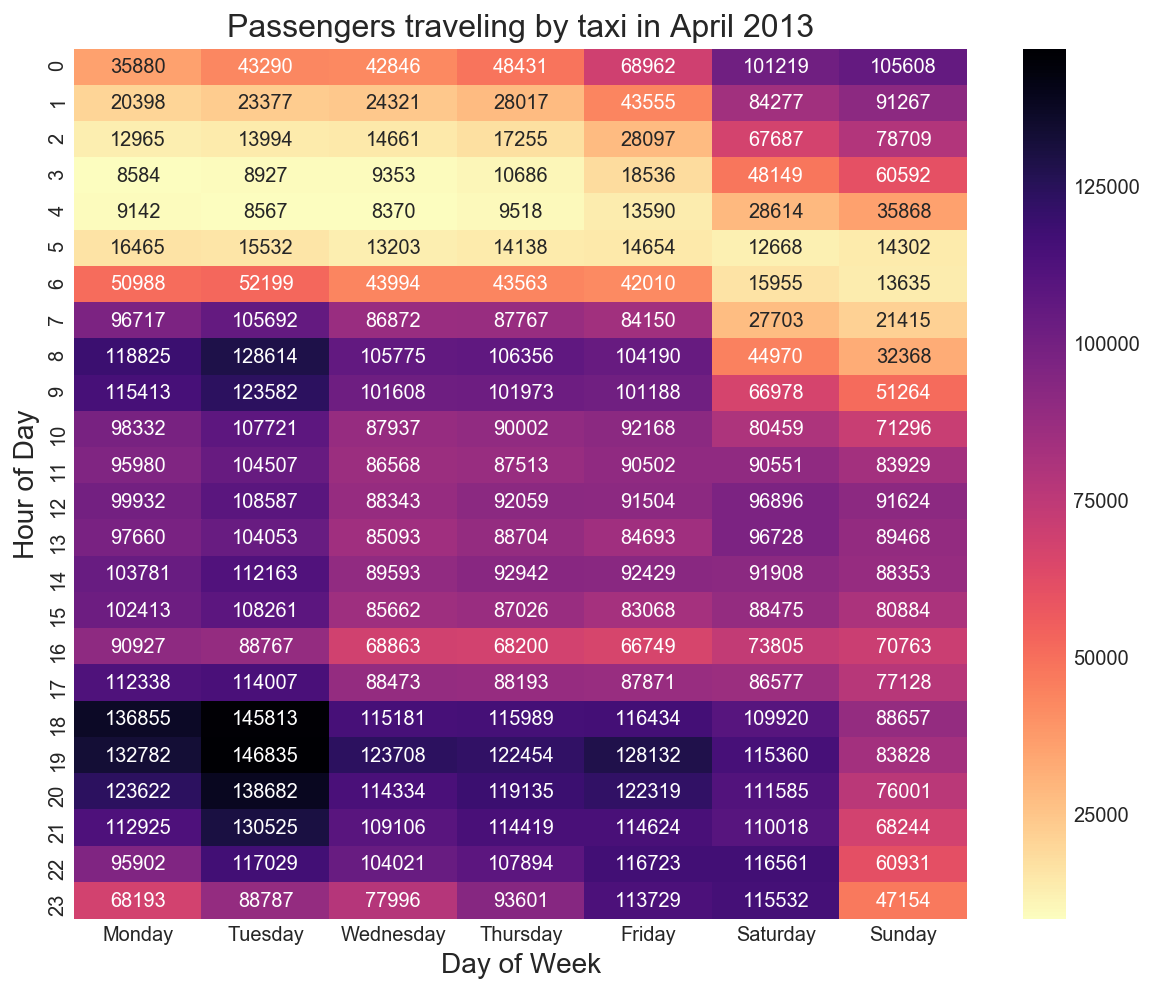

In [ ]:
# busiest days and hours for taxi drivers
busiest_df = taxidf6.groupby(['DayofWeek','Hour'])['passenger_count'].size().reset_index()
busiest_piv = pd.pivot_table(busiest_df, values="passenger_count",index=["Hour"], columns=["DayofWeek"], fill_value=0)
busiest_piv = busiest_piv[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(busiest_piv, ax=ax, cmap='magma_r', annot=True, fmt='g')
ax.set_xlabel('Day of Week', fontsize=14)
ax.set_ylabel('Hour of Day', fontsize=14)
ax.set_title('Passengers traveling by taxi in April 2013', fontsize=16)

### Evening Shift

In [ ]:
evening_df = taxidf6.copy()
evening_df = evening_df[evening_df.Hour >= 16]
evening_df.head()

medallion                      hack_license vendor_id  rate_code     pickup_datetime    dropoff_datetime  passenger_count  trip_time_in_secs  trip_distance  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude payment_type  fare_amount  surcharge  mta_tax  tip_amount  tolls_amount  total_amount        date pickup_geocode dropoff_geocode                          route  trip_time_in_hours  earnings_per_hour  earnings_per_mi DayofWeek  Hour
213650  C7376896E2CCE352A299472108E79900  C41892D3E7B42ACDE0C202A419A05D36       CMT          1 2013-04-01 16:00:00 2013-04-01 16:10:03                1                602            1.1            -73.99            40.75             -73.99             40.76          CRD          8.0        1.0      0.5         1.9          0.00         11.40  2013-04-01  40.75, -73.99   40.76, -73.99  40.75, -73.99 : 40.76, -73.99            0.167222          68.172757        10.363636    Monday    16
213651  1803A06155B880D1027E09C12042C949  4229BFE37EE5FCAF69F8891EB38FDD48       CMT          1 2013-04-01 16:00:00 2013-04-01 16:18:21                1               1101            3.1            -73.97            40.76             -74.00             40.72          CRD         14.5        1.0      0.5         4.8          0.00         20.80  2013-04-01  40.76, -73.97    40.72, -74.0   40.76, -73.97 : 40.72, -74.0            0.305833          68.010899         6.709677    Monday    16
213652  90227D00039EEFA93217DEC5A78CB5D3  F8D1F859F573158330CB14B55F08725B       CMT          1 2013-04-01 16:00:00 2013-04-01 16:03:00                1                167            0.6            -73.96            40.78             -73.95             40.79          CRD          4.0        1.0      0.5         1.0          0.00          6.50  2013-04-01  40.78, -73.96   40.79, -73.95  40.78, -73.96 : 40.79, -73.95            0.046389         140.119760        10.833333    Monday    16
213653  923D00A5FB2BD13C91A588139FD1783D  A7D26239619F8D0A17700657D154DB98       CMT          1 2013-04-01 16:00:00 2013-04-01 16:05:00                1                313            0.8            -73.99            40.76             -73.97             40.76          CRD          5.5        1.0      0.5         1.0          0.00          8.00  2013-04-01  40.76, -73.99   40.76, -73.97  40.76, -73.99 : 40.76, -73.97            0.086944          92.012780        10.000000    Monday    16
213654  57247FB98D9CC3E85B6DC19F9E1E7F42  96243CDED19B3243C8A8ED78EE2DA4B4       CMT          1 2013-04-01 16:00:00 2013-04-01 16:26:00                1               1546           10.8            -73.99            40.74             -73.87             40.77          CRD         32.0        1.0      0.5         4.0          5.33         42.83  2013-04-01  40.74, -73.99   40.77, -73.87  40.74, -73.99 : 40.77, -73.87            0.429444          99.733506         3.965741    Monday    16

In [ ]:
evening_df.groupby(['route'])['earnings_per_hour'].mean().sort_values(ascending=False).head(10)

route
40.77, -73.86 : 40.77, -73.86    1040.224859
40.82, -73.96 : 40.82, -73.96     602.320382
40.68, -74.0 : 40.68, -74.0       582.170984
40.75, -73.94 : 40.75, -73.94     378.659264
40.71, -73.95 : 40.71, -73.95     343.964469
40.74, -73.99 : 40.73, -73.95     328.862577
40.7, -73.99 : 40.7, -73.99       328.577197
40.72, -73.98 : 40.72, -73.98     321.860539
40.7, -74.01 : 40.7, -74.01       315.780968
40.81, -73.95 : 40.81, -73.95     310.212618
Name: earnings_per_hour, dtype: float64

In [ ]:
# evening trips generates the most money from airport transfer
start_loc = geolocator.reverse("40.77, -73.86")
print(start_loc.address)

D5, Delta Departures, East Elmhurst, Queens County, NYC, New York, 11368, United States of America


In [ ]:
start_loc = geolocator.reverse("40.82, -73.96")
print(start_loc.address)

700, West 133rd Street, Manhattanville, Manhattan Community Board 9, New York County, NYC, New York, 10027, United States of America


In [ ]:
start_loc = geolocator.reverse("40.68, -74.0")
print(start_loc.address)

38, 2nd Place, Carroll Gardens, Kings County, NYC, New York, 11231, United States of America


In [ ]:
evening_ordered = evening_df.groupby(['route'])['total_amount'].agg({sum, len}).reset_index()
evening_ordered.sort_values(['sum', 'len'], ascending=[False, False]).head(10)

route        sum      len
1704  40.76, -73.97 : 40.77, -73.96  265418.30  32957.0
2052  40.77, -73.87 : 40.76, -73.98  264738.60   6295.0
1685  40.76, -73.97 : 40.75, -73.99  257657.20  21997.0
1774  40.76, -73.98 : 40.75, -73.99  256092.94  27714.0
1684  40.76, -73.97 : 40.75, -73.98  230250.24  26871.0
1712  40.76, -73.97 : 40.78, -73.95  228276.54  21243.0
1674  40.76, -73.97 : 40.74, -73.99  221808.01  18237.0
1436  40.75, -73.99 : 40.76, -73.98  210227.75  22704.0
1051  40.74, -73.99 : 40.75, -73.98  203275.33  23730.0
1695  40.76, -73.97 : 40.76, -73.99  202501.08  18333.0

In [ ]:
start_loc = geolocator.reverse("40.76, -73.97")
print(start_loc.address)

664, Lexington Avenue, Lenox Hill, Manhattan Community Board 8, New York County, NYC, New York, 10022, United States of America


In [ ]:
start_loc = geolocator.reverse("40.77, -73.96")
print(start_loc.address)

203, East 72nd Street, Upper East Side, Manhattan Community Board 8, New York County, NYC, New York, 10021, United States of America


In [ ]:
evening_ordered['rev_per_trip'] = evening_ordered.iloc[:,1]/evening_ordered.iloc[:,2]
evening_ordered.sort_values('rev_per_trip').tail(10)

route       sum    len  rev_per_trip
132    40.7, -74.01 : 40.77, -73.87   9201.35  182.0     50.556868
2020  40.77, -73.87 : 40.71, -74.02  29740.38  587.0     50.665043
591   40.72, -74.01 : 40.77, -73.86   6565.30  128.0     51.291406
1203  40.74, -74.01 : 40.77, -73.86   4028.01   78.0     51.641154
2028  40.77, -73.87 : 40.72, -74.02  11115.46  214.0     51.941402
265   40.71, -74.01 : 40.77, -73.86  17735.30  337.0     52.627003
1964  40.77, -73.86 : 40.71, -74.02  14676.89  277.0     52.985162
131    40.7, -74.01 : 40.77, -73.86   6474.27  120.0     53.952250
308   40.71, -74.02 : 40.77, -73.87   7426.09  136.0     54.603603
307   40.71, -74.02 : 40.77, -73.86   4972.60   87.0     57.156322